Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [1]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [2]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [3]:
#!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

In [4]:
#!bash ./scripts/download_cyclegan_model.sh monet2photo
#!cp ./checkpoints/monet2photo_pretrained/latest_net_G.pth ./checkpoints/vangogh2photo/latest_net_G_A.pth

In [5]:
#!bash ./scripts/download_cyclegan_model.sh style_monet
#!cp ./checkpoints/style_monet_pretrained/latest_net_G.pth ./checkpoints/vangogh2photo/latest_net_G_B.pth

# Training

-   `python train.py --dataroot ./datasets/vangogh2photo --name vangogh2photo --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 8 fits onto the VM's GPU and can finish training an epoch in ~15min.

Use `--continue_train` to continue a previous training session, then specify the epoch you want to resume through `--epoch_count {last completed epoch + 1}`.

In [12]:
!python train.py --dataroot datasets/vangoghlandscape2photo --name vangogh2photo --model cycle_gan --batch_size 8 --num_threads 8 --no_dropout --save_latest_freq 500 --continue_train --epoch_count 68

----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: datasets/vangoghlandscape2photo	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest        



Could not connect to Visdom server. 
 Trying to start a server....
Command: /opt/anaconda3/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/vangogh2photo/web...
/opt/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
learning rate 0.0002000 -> 0.0002000
(epoch: 68, iters: 200, time: 0.168, data: 3.376) D_A: 0.338 G_A: 0.367 cycle_A: 1.286 idt_A: 0.530 D_B: 0.271 G_B: 0.556 cycle_B: 1.152 idt_B: 0.525 
(epoch: 68, iters: 400, time: 0.300, data: 0.003) D_A: 0.2

(epoch: 85, iters: 120, time: 0.316, data: 0.003) D_A: 0.147 G_A: 0.434 cycle_A: 1.265 idt_A: 0.439 D_B: 0.178 G_B: 0.655 cycle_B: 1.099 idt_B: 0.527 
(epoch: 85, iters: 320, time: 0.171, data: 0.002) D_A: 0.158 G_A: 0.436 cycle_A: 1.133 idt_A: 0.591 D_B: 0.275 G_B: 0.189 cycle_B: 1.416 idt_B: 0.458 
saving the model at the end of epoch 85, iters 7920
End of epoch 85 / 200 	 Time Taken: 77 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 86, iters: 80, time: 0.331, data: 0.003) D_A: 0.228 G_A: 0.817 cycle_A: 1.235 idt_A: 0.441 D_B: 0.169 G_B: 0.305 cycle_B: 1.069 idt_B: 0.498 
saving the latest model (epoch 86, total_iters 8000)
(epoch: 86, iters: 280, time: 0.170, data: 0.004) D_A: 0.242 G_A: 0.194 cycle_A: 1.093 idt_A: 0.527 D_B: 0.177 G_B: 0.280 cycle_B: 1.125 idt_B: 0.475 
End of epoch 86 / 200 	 Time Taken: 76 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 87, iters: 40, time: 0.328, data: 0.003) D_A: 0.228 G_A: 0.123 cycle_A: 1.130 idt_A: 0.513 D_B: 0.168 G_B: 0.636 cycle_B: 1.

(epoch: 103, iters: 400, time: 0.171, data: 0.003) D_A: 0.151 G_A: 0.415 cycle_A: 1.120 idt_A: 0.464 D_B: 0.168 G_B: 0.479 cycle_B: 1.032 idt_B: 0.500 
End of epoch 103 / 200 	 Time Taken: 74 sec
learning rate 0.0001921 -> 0.0001901
(epoch: 104, iters: 160, time: 0.326, data: 0.003) D_A: 0.208 G_A: 0.509 cycle_A: 1.122 idt_A: 0.404 D_B: 0.107 G_B: 0.492 cycle_B: 1.008 idt_B: 0.523 
saving the latest model (epoch 104, total_iters 16000)
(epoch: 104, iters: 360, time: 0.171, data: 0.003) D_A: 0.200 G_A: 0.290 cycle_A: 1.243 idt_A: 0.391 D_B: 0.171 G_B: 0.551 cycle_B: 0.897 idt_B: 0.542 
End of epoch 104 / 200 	 Time Taken: 75 sec
learning rate 0.0001901 -> 0.0001881
(epoch: 105, iters: 120, time: 0.335, data: 0.003) D_A: 0.176 G_A: 0.391 cycle_A: 1.106 idt_A: 0.434 D_B: 0.187 G_B: 0.511 cycle_B: 0.936 idt_B: 0.440 
(epoch: 105, iters: 320, time: 0.171, data: 0.004) D_A: 0.125 G_A: 0.344 cycle_A: 0.960 idt_A: 0.359 D_B: 0.138 G_B: 0.402 cycle_B: 0.823 idt_B: 0.494 
saving the model at the

(epoch: 122, iters: 40, time: 0.170, data: 0.008) D_A: 0.179 G_A: 0.391 cycle_A: 1.013 idt_A: 0.376 D_B: 0.236 G_B: 0.236 cycle_B: 0.772 idt_B: 0.398 
(epoch: 122, iters: 240, time: 0.372, data: 0.002) D_A: 0.173 G_A: 0.353 cycle_A: 0.952 idt_A: 0.353 D_B: 0.232 G_B: 0.345 cycle_B: 0.747 idt_B: 0.412 
saving the latest model (epoch 122, total_iters 24000)
(epoch: 122, iters: 440, time: 0.135, data: 0.003) D_A: 0.235 G_A: 0.343 cycle_A: 0.989 idt_A: 0.290 D_B: 0.262 G_B: 0.326 cycle_B: 0.634 idt_B: 0.457 
End of epoch 122 / 200 	 Time Taken: 75 sec
learning rate 0.0001545 -> 0.0001525
(epoch: 123, iters: 200, time: 0.357, data: 1.089) D_A: 0.164 G_A: 0.710 cycle_A: 0.933 idt_A: 0.277 D_B: 0.221 G_B: 0.231 cycle_B: 0.644 idt_B: 0.387 
(epoch: 123, iters: 400, time: 0.171, data: 0.003) D_A: 0.148 G_A: 0.557 cycle_A: 1.141 idt_A: 0.289 D_B: 0.208 G_B: 0.250 cycle_B: 0.651 idt_B: 0.428 
End of epoch 123 / 200 	 Time Taken: 73 sec
learning rate 0.0001525 -> 0.0001505
(epoch: 124, iters: 160,

(epoch: 140, iters: 320, time: 0.367, data: 0.002) D_A: 0.168 G_A: 0.270 cycle_A: 0.965 idt_A: 0.310 D_B: 0.238 G_B: 0.338 cycle_B: 0.713 idt_B: 0.398 
saving the latest model (epoch 140, total_iters 32000)
saving the model at the end of epoch 140, iters 32120
End of epoch 140 / 200 	 Time Taken: 79 sec
learning rate 0.0001188 -> 0.0001168
(epoch: 141, iters: 80, time: 0.171, data: 0.003) D_A: 0.146 G_A: 0.460 cycle_A: 0.997 idt_A: 0.312 D_B: 0.224 G_B: 0.301 cycle_B: 0.720 idt_B: 0.393 
(epoch: 141, iters: 280, time: 0.376, data: 0.002) D_A: 0.173 G_A: 0.374 cycle_A: 0.957 idt_A: 0.393 D_B: 0.245 G_B: 0.304 cycle_B: 0.784 idt_B: 0.392 
End of epoch 141 / 200 	 Time Taken: 74 sec
learning rate 0.0001168 -> 0.0001149
(epoch: 142, iters: 40, time: 0.171, data: 0.004) D_A: 0.131 G_A: 0.388 cycle_A: 0.854 idt_A: 0.301 D_B: 0.225 G_B: 0.292 cycle_B: 0.647 idt_B: 0.349 
(epoch: 142, iters: 240, time: 0.386, data: 0.002) D_A: 0.166 G_A: 0.455 cycle_A: 1.015 idt_A: 0.327 D_B: 0.219 G_B: 0.272 

saving the latest model (epoch 158, total_iters 40000)
End of epoch 158 / 200 	 Time Taken: 76 sec
learning rate 0.0000832 -> 0.0000812
(epoch: 159, iters: 160, time: 0.171, data: 0.003) D_A: 0.181 G_A: 0.415 cycle_A: 0.844 idt_A: 0.218 D_B: 0.205 G_B: 0.347 cycle_B: 0.541 idt_B: 0.361 
(epoch: 159, iters: 360, time: 0.386, data: 0.006) D_A: 0.154 G_A: 0.531 cycle_A: 0.956 idt_A: 0.225 D_B: 0.188 G_B: 0.448 cycle_B: 0.537 idt_B: 0.397 
End of epoch 159 / 200 	 Time Taken: 74 sec
learning rate 0.0000812 -> 0.0000792
(epoch: 160, iters: 120, time: 0.171, data: 0.003) D_A: 0.144 G_A: 0.475 cycle_A: 0.892 idt_A: 0.250 D_B: 0.172 G_B: 0.344 cycle_B: 0.549 idt_B: 0.337 
(epoch: 160, iters: 320, time: 0.394, data: 0.003) D_A: 0.100 G_A: 0.463 cycle_A: 0.956 idt_A: 0.264 D_B: 0.172 G_B: 0.341 cycle_B: 0.583 idt_B: 0.373 
saving the model at the end of epoch 160, iters 40920
End of epoch 160 / 200 	 Time Taken: 77 sec
learning rate 0.0000792 -> 0.0000772
(epoch: 161, iters: 80, time: 0.171, dat

(epoch: 177, iters: 240, time: 0.171, data: 0.003) D_A: 0.159 G_A: 0.487 cycle_A: 0.830 idt_A: 0.263 D_B: 0.154 G_B: 0.358 cycle_B: 0.582 idt_B: 0.318 
(epoch: 177, iters: 440, time: 0.171, data: 0.006) D_A: 0.197 G_A: 0.373 cycle_A: 0.888 idt_A: 0.284 D_B: 0.196 G_B: 0.378 cycle_B: 0.618 idt_B: 0.362 
End of epoch 177 / 200 	 Time Taken: 76 sec
learning rate 0.0000455 -> 0.0000436
(epoch: 178, iters: 200, time: 0.171, data: 1.512) D_A: 0.131 G_A: 0.473 cycle_A: 0.901 idt_A: 0.261 D_B: 0.158 G_B: 0.399 cycle_B: 0.614 idt_B: 0.351 
(epoch: 178, iters: 400, time: 0.410, data: 0.002) D_A: 0.111 G_A: 0.729 cycle_A: 0.898 idt_A: 0.226 D_B: 0.161 G_B: 0.352 cycle_B: 0.554 idt_B: 0.365 
End of epoch 178 / 200 	 Time Taken: 74 sec
learning rate 0.0000436 -> 0.0000416
(epoch: 179, iters: 160, time: 0.171, data: 0.003) D_A: 0.168 G_A: 0.478 cycle_A: 0.861 idt_A: 0.257 D_B: 0.199 G_B: 0.292 cycle_B: 0.625 idt_B: 0.333 
saving the latest model (epoch 179, total_iters 49000)
(epoch: 179, iters: 360

saving the model at the end of epoch 195, iters 56320
End of epoch 195 / 200 	 Time Taken: 79 sec
learning rate 0.0000099 -> 0.0000079
(epoch: 196, iters: 80, time: 0.422, data: 0.003) D_A: 0.146 G_A: 0.464 cycle_A: 0.867 idt_A: 0.333 D_B: 0.187 G_B: 0.435 cycle_B: 0.754 idt_B: 0.352 
(epoch: 196, iters: 280, time: 0.171, data: 0.002) D_A: 0.165 G_A: 0.459 cycle_A: 0.827 idt_A: 0.317 D_B: 0.210 G_B: 0.368 cycle_B: 0.678 idt_B: 0.317 
End of epoch 196 / 200 	 Time Taken: 74 sec
learning rate 0.0000079 -> 0.0000059
(epoch: 197, iters: 40, time: 0.411, data: 0.003) D_A: 0.147 G_A: 0.429 cycle_A: 0.882 idt_A: 0.276 D_B: 0.184 G_B: 0.376 cycle_B: 0.619 idt_B: 0.341 
(epoch: 197, iters: 240, time: 0.171, data: 0.004) D_A: 0.168 G_A: 0.472 cycle_A: 0.859 idt_A: 0.236 D_B: 0.199 G_B: 0.393 cycle_B: 0.563 idt_B: 0.345 
saving the latest model (epoch 197, total_iters 57000)
(epoch: 197, iters: 440, time: 0.187, data: 0.003) D_A: 0.234 G_A: 0.341 cycle_A: 0.740 idt_A: 0.243 D_B: 0.170 G_B: 0.396 

# Testing

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/vangogh2photo/latest_net_G_A.pth ./checkpoints/vangogh2photo/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/vangogh2photo/latest_net_G_B.pth ./checkpoints/vangogh2photo/latest_net_G.pth` if you want to transform images from class B to class A.

-   `python test.py --dataroot datasets/vangogh2photo/testA --name vangogh2photo --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.


> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option `--model test` is used for generating results of CycleGAN only for one side. This option will automatically set `--dataset_mode single`, which only loads the images from one set. On the contrary, using `--model cycle_gan` requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at `./results/`. Use `--results_dir {directory_path_to_save_result}` to specify the results directory.

> For your own experiments, you might want to specify `--netG`, `--norm`, `--no_dropout` to match the generator architecture of the trained model.

In [13]:
!cp ./checkpoints/vangogh2photo/latest_net_G_A.pth ./checkpoints/vangogh2photo/latest_net_G.pth

In [19]:
!python test.py --dataroot ./datasets/vangoghlandscape2photo/testA --name vangogh2photo --model test --num_test 258  --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/vangoghlandscape2photo/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                   

# Visualize

In [20]:
results_dir = "./results/vangogh2photo/test_latest/images"

fake_images = [x for x in os.listdir(results_dir) if 'fake' in x]
real_images = [x for x in os.listdir(results_dir) if 'real' in x]

In [21]:
fake_images.sort()
real_images.sort()

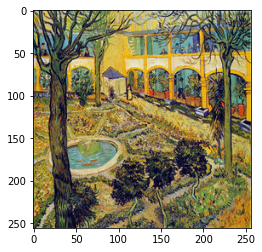

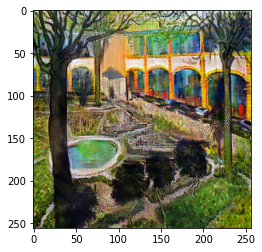

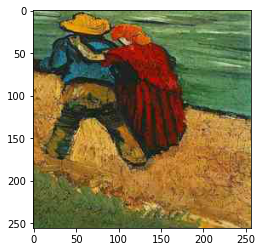

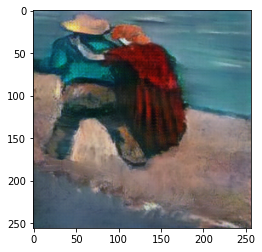

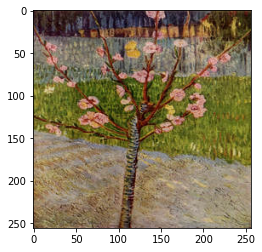

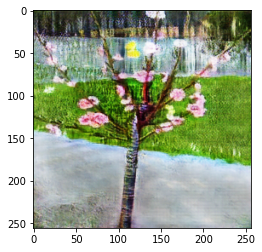

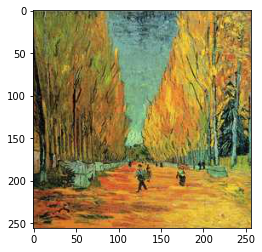

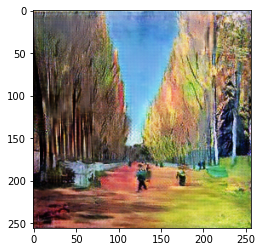

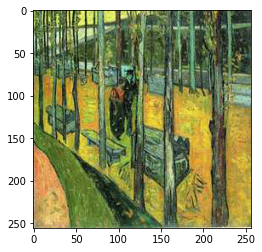

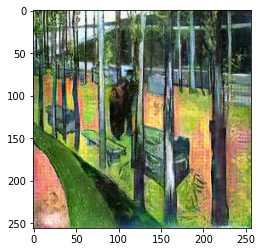

In [22]:
import matplotlib.pyplot as plt

for i in range(5):
  # display real image
  img = plt.imread(os.path.join(results_dir, real_images[i]))
  plt.imshow(img)
  plt.show()

  # display fake image
  img = plt.imread(os.path.join(results_dir, fake_images[i]))
  plt.imshow(img)
  plt.show()